## Wrong label classifyer
The purpose of this file is to see if it is possible to repcliate the ressults of Soltani 2022 if the data columns of Tset and Tamb is swapped.

In [28]:
#import libraries
%load_ext autoreload
%autoreload 2

import numpy as np
from scipy import linalg
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

import pandas as pd

from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler


import confusion_matrix2

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "cmr"
})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
# Load testing data
train_data = pd.read_csv("../TrainingData/neodata/soltani_all_nonoise_1200.csv")
val_data = pd.read_csv("../ValidationData/neodata/soltani_all_nonoise_1200.csv")
test_data = pd.read_csv("../TestData/neodata/soltani_all_nonoise_100.csv")

#Swap ambient and set point temprature for nonfaulty data.
#Code is ugly but works ;)
train_data1 = train_data.copy()
train_data_faulty = train_data1[train_data1['target']!=0]
train_data1_nonfaulty = train_data1[train_data1['target']==0]
train_data1_nonfaulty = train_data1_nonfaulty[['Pdis','T0','Tc','Tdis','Tret','Tsuc','Tsh','Tsup','CondFan','Tset','Tamb','target']]
train_data1_nonfaulty = train_data1_nonfaulty.rename(columns = {'Tset':'Tamb','Tamb':'Tset'})
train_data = pd.concat([train_data1_nonfaulty, train_data_faulty])

val_data1 = val_data.copy()
val_data_faulty = val_data1[val_data1['target']!=0]
val_data1_nonfaulty = val_data1[val_data1['target']==0]
val_data1_nonfaulty = val_data1_nonfaulty[['Pdis','T0','Tc','Tdis','Tret','Tsuc','Tsh','Tsup','CondFan','Tset','Tamb','target']]
val_data1_nonfaulty = val_data1_nonfaulty.rename(columns = {'Tset':'Tamb','Tamb':'Tset'})
val_data = pd.concat([val_data1_nonfaulty, val_data_faulty])

test_data1 = test_data.copy()
test_data_faulty = test_data1[test_data1['target']!=0]
test_data1_nonfaulty = test_data1[test_data1['target']==0]
test_data1_nonfaulty = test_data1_nonfaulty[['Pdis','T0','Tc','Tdis','Tret','Tsuc','Tsh','Tsup','CondFan','Tset','Tamb','target']]
test_data1_nonfaulty = test_data1_nonfaulty.rename(columns = {'Tset':'Tamb','Tamb':'Tset'})
test_data = pd.concat([test_data1_nonfaulty, test_data_faulty])

In [30]:
# Scaling to zero mean and unit variance
Standard = StandardScaler()         # sklearn.preprocessing 
'''
X_trn = Standard.fit_transform(train_data.drop(['target'],axis =1 ))
X_val = Standard.transform(val_data.drop(['target'],axis=1))
X_tst = Standard.transform(test_data.drop(['target'],axis =1 ))
'''
X_trn = scale(train_data.drop(['target'],axis =1 ))
X_val = scale(val_data.drop(['target'],axis=1))
X_tst = scale(test_data.drop(['target'],axis =1 ))

Y_trn = np.ravel(train_data['target'])
Y_val = np.ravel(val_data['target'])
Y_tst = np.ravel(test_data['target'])



# SVM

(<Figure size 1000x1000 with 1 Axes>,
 <AxesSubplot:title={'center':'Validation data : Accuracy 94.159%'}, xlabel='Predicted class', ylabel='True class'>)

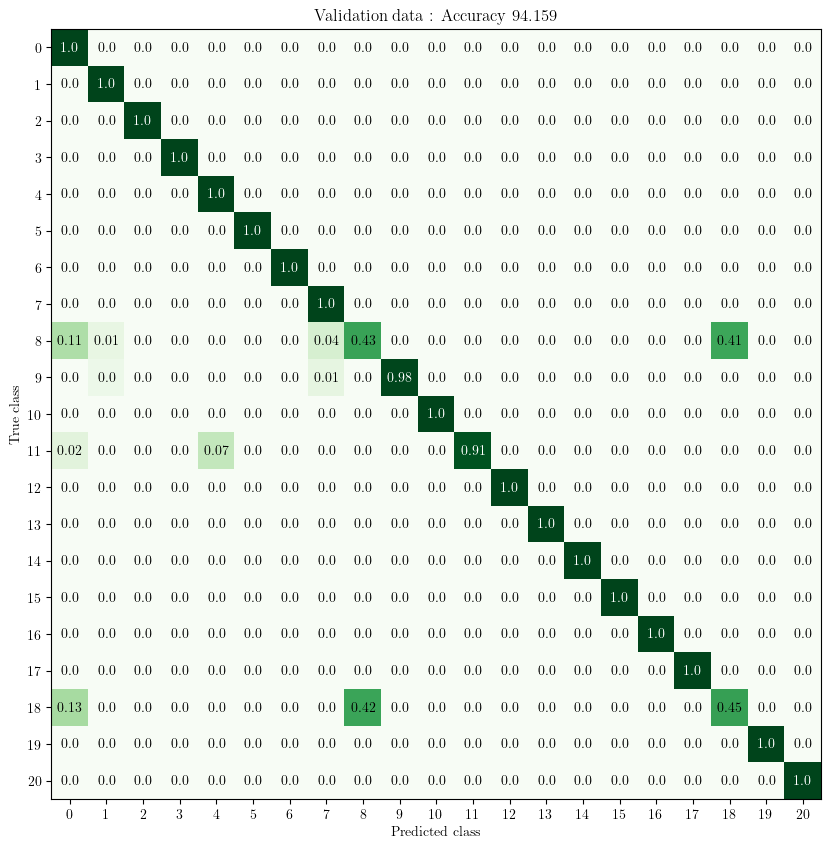

In [31]:
from sklearn import svm

#Train SVM
clf = svm.SVC( kernel="rbf", decision_function_shape="ovo", C=1000, gamma=0.002)
clf.fit(X_trn,Y_trn)

# Test on test data
Y_val_predict = clf.predict(X_val)

#Generate confusion matrix pdf
confusion_matrix2.confusion_matrix(Y_val,Y_val_predict, figsize = (10,10), save_fig_name = 'SVM_validation_swap.pdf', title = 'Validation data',eval_labels = False)


(<Figure size 1000x1000 with 1 Axes>,
 <AxesSubplot:title={'center':'Test data : Accuracy 90.476%'}, xlabel='Predicted class', ylabel='True class'>)

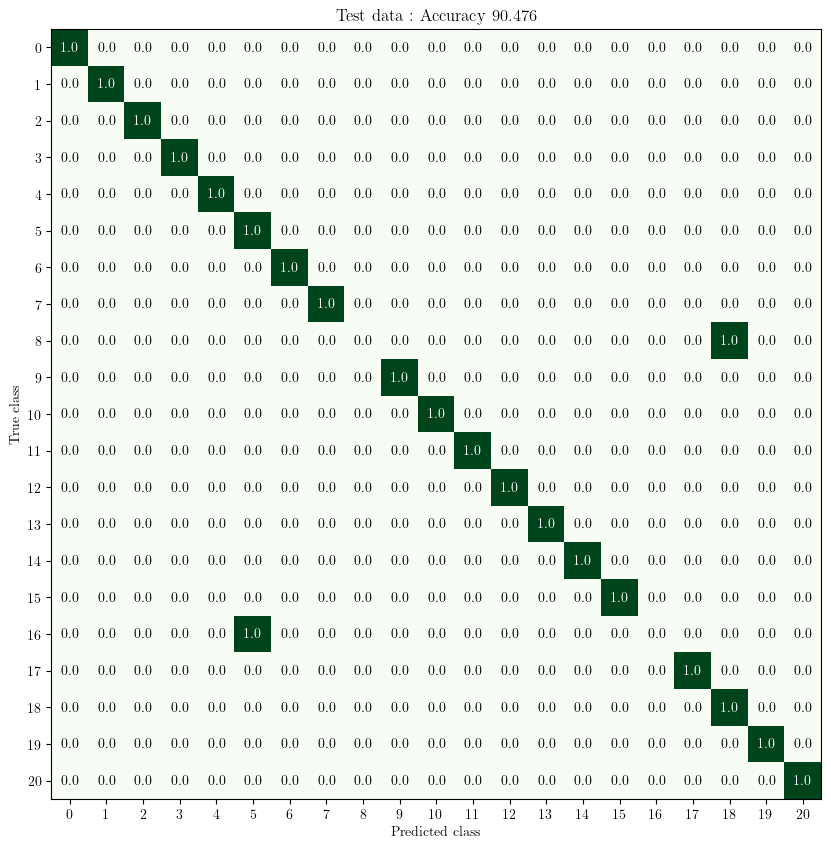

In [32]:
# Test on test data
Y_tst_predict = clf.predict(X_tst)

#Generate confusion matrix pdf
confusion_matrix2.confusion_matrix(Y_tst,Y_tst_predict, figsize = (10,10), save_fig_name = 'SVM_test_swap.pdf', title = 'Test data',eval_labels = False)

## LDA-SVM 

Preserving 98.69% of variance


c:\Users\laula\OneDrive\Documents\GitHub\p7-ml-refrigeration-fault-detection\Python\lda.py:69: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self.target_id in data: target_id = self.target_id


(<Figure size 1000x1000 with 1 Axes>,
 <AxesSubplot:title={'center':'Validation data : Accuracy 80.456%'}, xlabel='Predicted class', ylabel='True class'>)

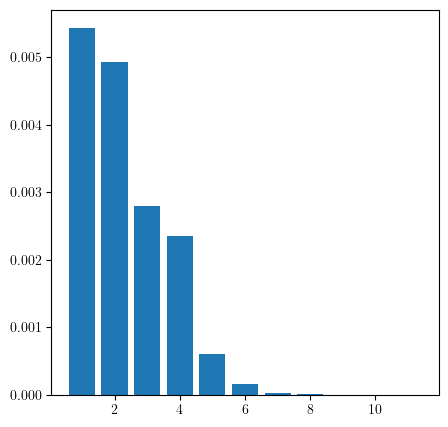

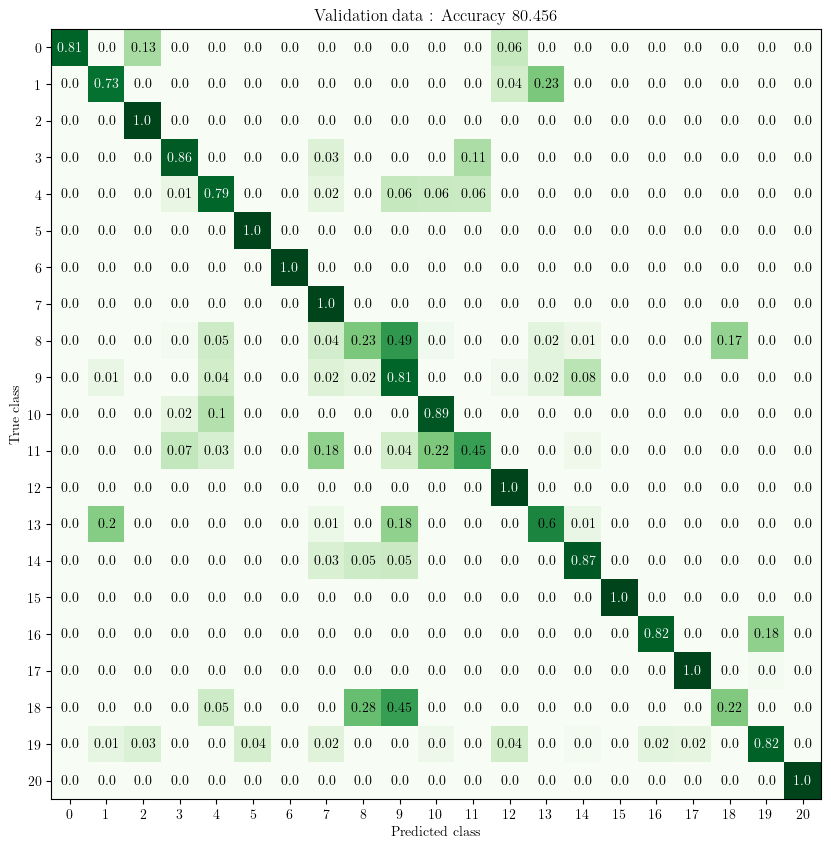

In [33]:
from lda import LDA_reducer as reducer
LDA = reducer(train_data,5,'target')

LDA_trn =LDA.transform(X_trn)
LDA_val =LDA.transform(X_val)
LDA_tst =LDA.transform(X_tst)

clf_SVM_LDA = svm.SVC(kernel="rbf", decision_function_shape="ovo", C=1000, gamma=0.01)

clf_SVM_LDA.fit(LDA_trn,Y_trn)

# Test on test data
Y_val_predict = clf_SVM_LDA.predict(LDA_val)

#Generate confusion matrix pdf
confusion_matrix2.confusion_matrix(Y_val,Y_val_predict, figsize = (10,10), save_fig_name = 'SVM-LDA_val_swap.pdf', title = 'Validation data',eval_labels = False)


(<Figure size 1000x1000 with 1 Axes>,
 <AxesSubplot:title={'center':'Test data : Accuracy 29.143%'}, xlabel='Predicted class', ylabel='True class'>)

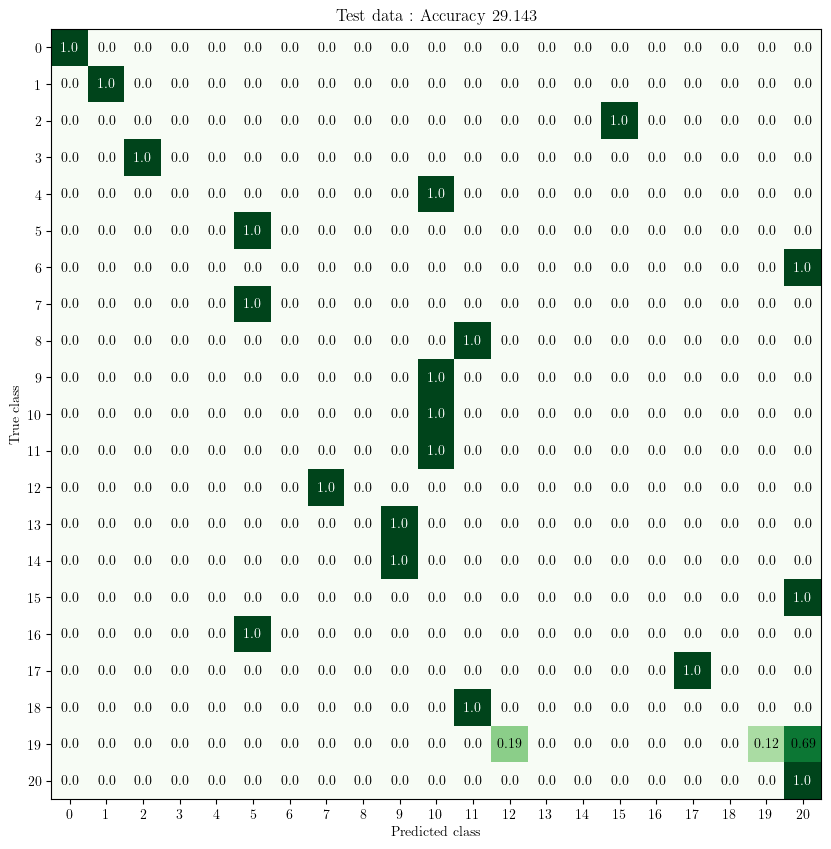

In [34]:
Y_tst_predict = clf_SVM_LDA.predict(LDA_tst)

#Generate confusion matrix pdf
confusion_matrix2.confusion_matrix(Y_tst,Y_tst_predict, figsize = (10,10), save_fig_name = 'SVM-LDA_test_swap.pdf', title = 'Test data',eval_labels = False)

This file has showed that it improves accuracy and false positive rate if the mentioned columns is swapped. However the results are still not as good as Soltani 2022. Thereby it is concluded that the results of Soltani 2022 can not be replicated by swapping the columns.